<a href="https://colab.research.google.com/github/AmitHemantJadhav/Purdue-Data-Mine---BASF/blob/main/BASF_ML_Noteboo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Downloading...
From: https://drive.google.com/uc?id=1UTV2i3WqbNK9in7w9k9Sy3rg5XLT1Mew
To: /content/cleaned_dataset.csv
100%|██████████| 47.4M/47.4M [00:00<00:00, 155MB/s]



Loading dataset...

Dataset Shape: (466245, 14)
Columns: ['TransactionDate', 'CustomerID', 'CustomerName', 'City', 'County', 'State', 'Brand', 'UnitPrice', 'OrderQuantity', 'Persona_Segment', 'TotalAmount', 'V2', 'filter_$', 'PrimaryLast']

EXPLORATORY DATA ANALYSIS

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466245 entries, 0 to 466244
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   TransactionDate  466245 non-null  object 
 1   CustomerID       466245 non-null  object 
 2   CustomerName     466245 non-null  object 
 3   City             466245 non-null  object 
 4   County           466245 non-null  object 
 5   State            466245 non-null  object 
 6   Brand            466245 non-null  object 
 7   UnitPrice        466245 non-null  float64
 8   OrderQuantity    466245 non-null  int64  
 9   Persona_Segment  466244 non-null  object 
 10  TotalAmount      466245 non-null  flo

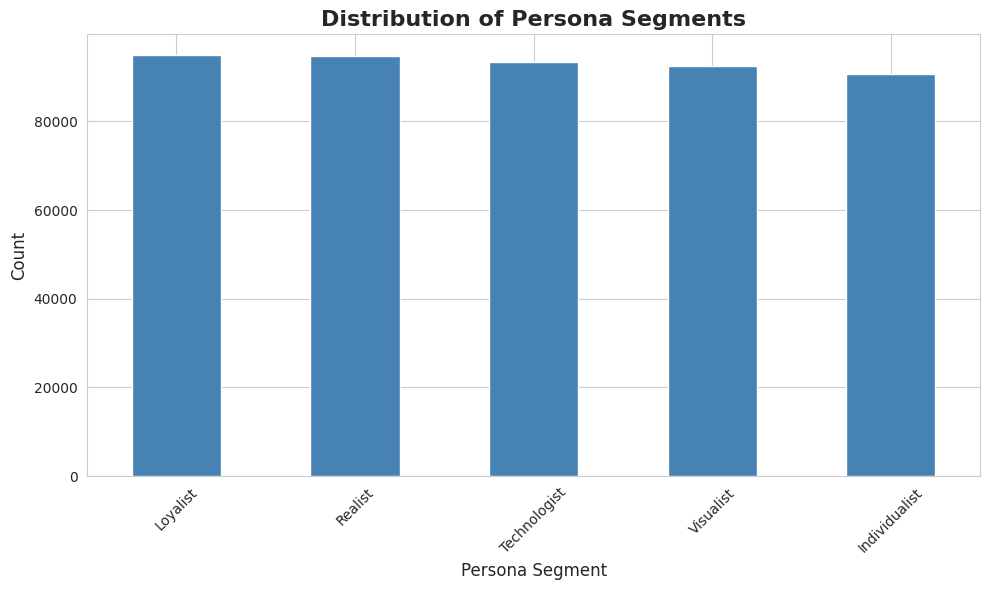


DATA PREPROCESSING

Features shape: (466244, 5)
Target shape: (466244,)

Feature columns: ['UnitPrice', 'OrderQuantity', 'TotalAmount', 'filter_$', 'PrimaryLast']

Target classes: ['Technologist' 'Realist' 'Individualist' 'Loyalist' 'Visualist']

Training set size: 372995
Testing set size: 93249

Feature scaling completed.

MODEL TRAINING

Training Logistic Regression model...
Model training completed!

MODEL EVALUATION

Training Accuracy: 0.2045 (20.45%)
Testing Accuracy: 0.2026 (20.26%)

--------------------------------------------------------------------------------
CLASSIFICATION REPORT (Test Set)
--------------------------------------------------------------------------------
               precision    recall  f1-score   support

Individualist       0.00      0.00      0.00     18123
     Loyalist       0.20      0.50      0.29     18980
      Realist       0.20      0.40      0.27     18967
 Technologist       0.20      0.10      0.13     18701
    Visualist       0.00      0.0

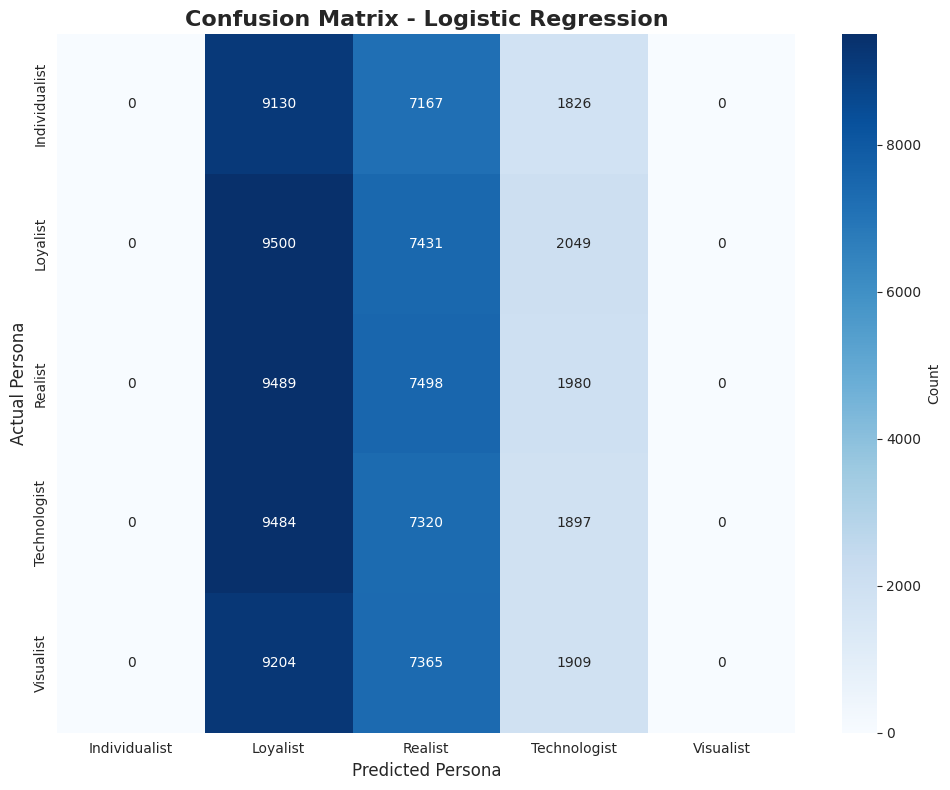


FEATURE IMPORTANCE ANALYSIS

Feature Coefficients:
               Individualist  Loyalist   Realist  Technologist  Visualist
UnitPrice           0.004461 -0.006055 -0.006387      0.016722  -0.008740
OrderQuantity       0.002245 -0.001932 -0.009483      0.013776  -0.004606
TotalAmount        -0.001794  0.008272  0.010191     -0.030697   0.014028
filter_$            0.000000  0.000000  0.000000      0.000000   0.000000
PrimaryLast         0.000000  0.000000  0.000000      0.000000   0.000000


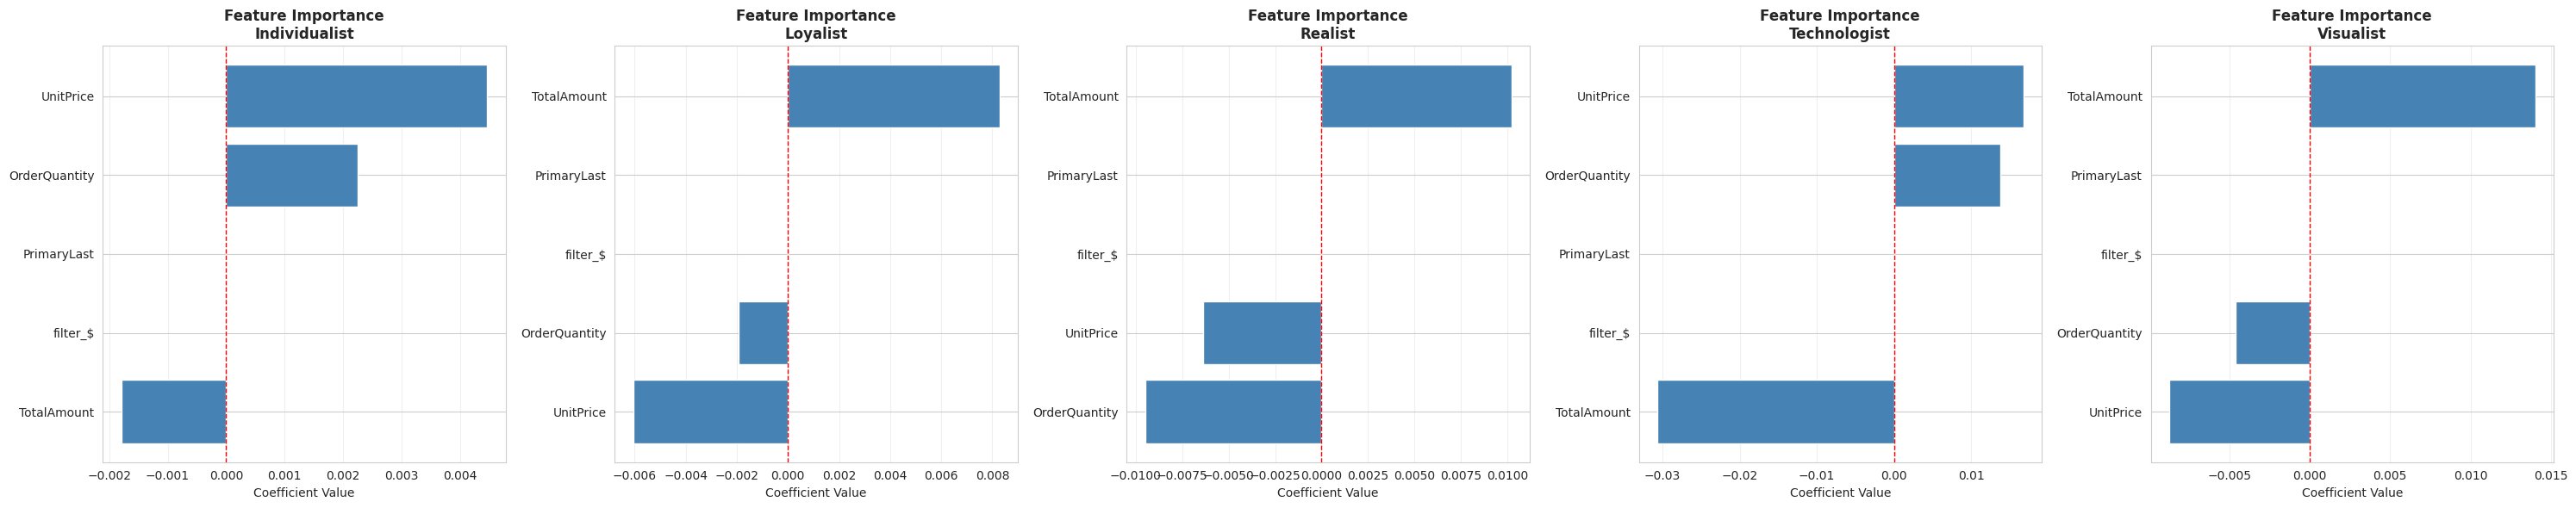


ROC CURVE ANALYSIS


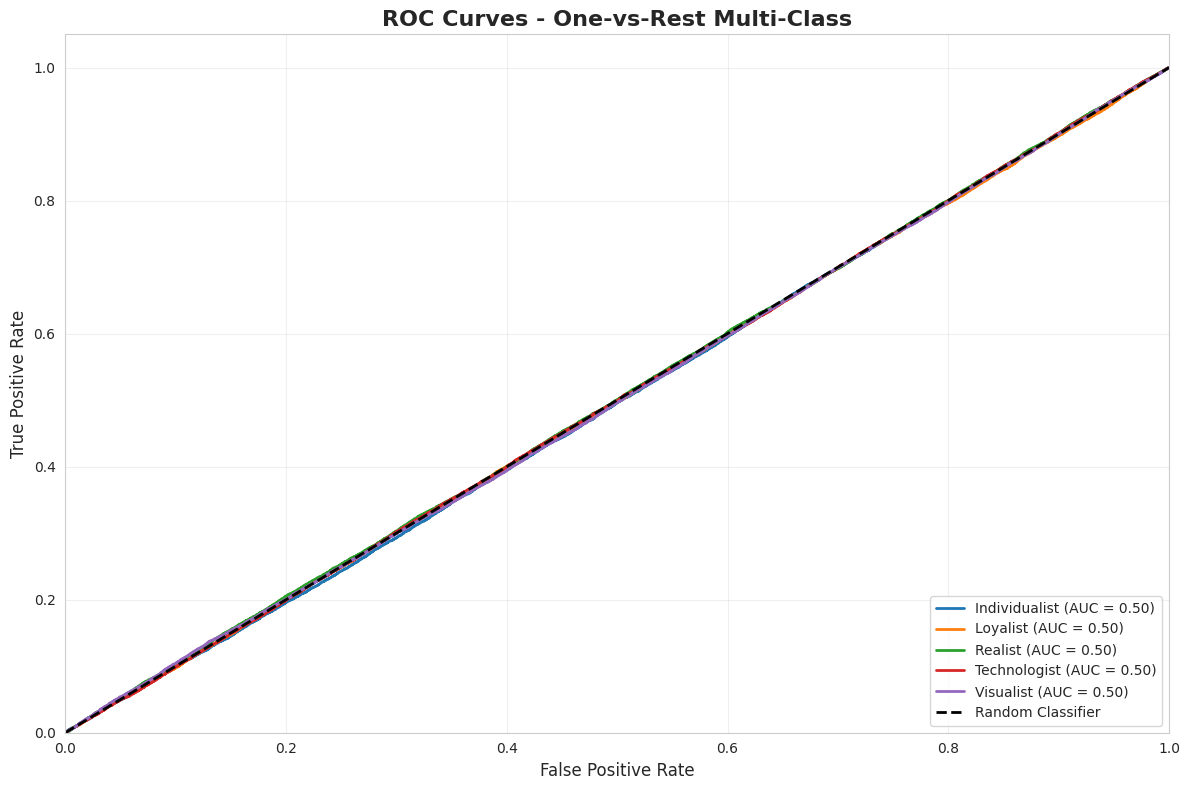


ROC AUC Scores:
Individualist: 0.4970
Loyalist: 0.4984
Realist: 0.5017
Technologist: 0.4995
Visualist: 0.4989

PERSONA CHARACTERISTICS

Mean values by Persona Segment:
                  UnitPrice  OrderQuantity  TotalAmount  filter_$  PrimaryLast
Persona_Segment                                                               
Individualist    159.876855       5.001446   799.619900       0.0          1.0
Loyalist         159.837880       5.008598   800.685154       0.0          1.0
Realist          159.936896       4.991216   799.257545       0.0          1.0
Technologist     159.477399       4.989594   794.067811       0.0          1.0
Visualist        159.936691       5.005975   801.954664       0.0          1.0


<Figure size 1200x600 with 0 Axes>

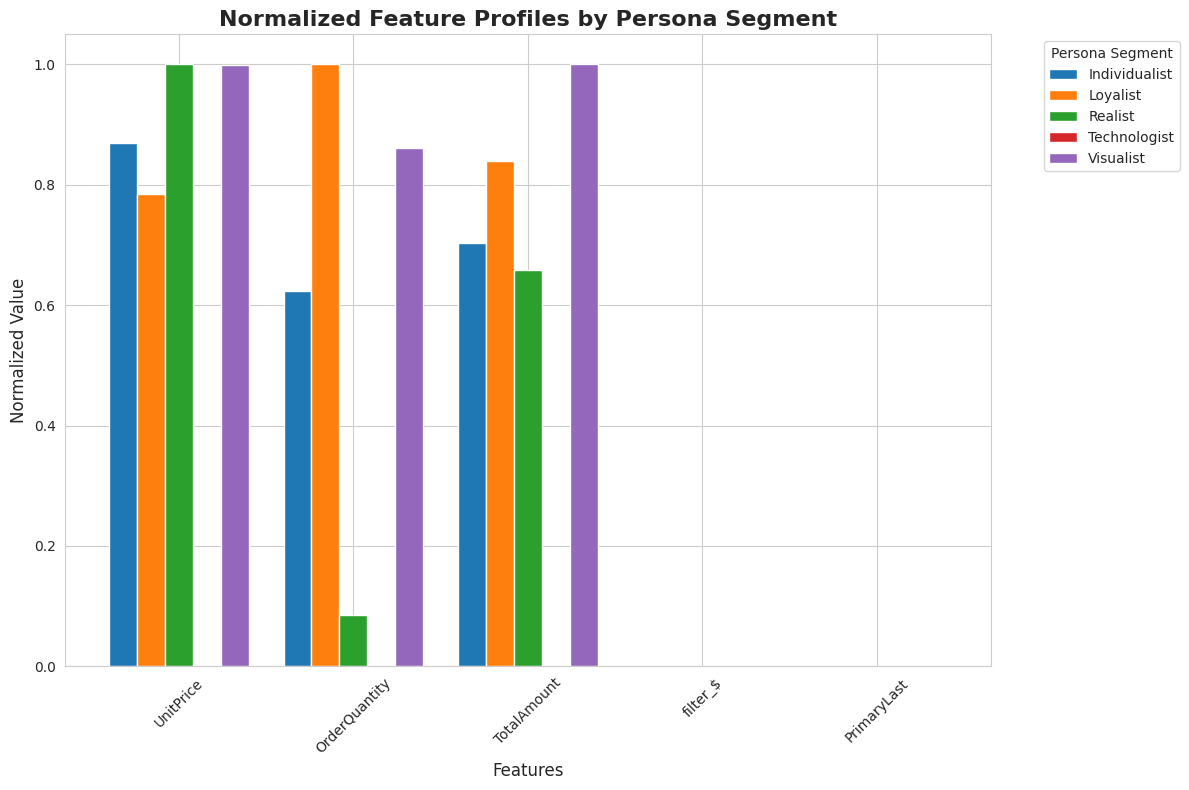


MODEL SUMMARY

Model: Logistic Regression
Number of Classes: 5
Classes: ['Individualist', 'Loyalist', 'Realist', 'Technologist', 'Visualist']
Number of Features: 5
Feature Names: ['UnitPrice', 'OrderQuantity', 'TotalAmount', 'filter_$', 'PrimaryLast']

Training Samples: 372995
Testing Samples: 93249

Final Test Accuracy: 0.2026 (20.26%)

SAMPLE PREDICTIONS

First 10 Test Predictions:
       Actual    Predicted  Correct
      Realist     Loyalist    False
 Technologist     Loyalist    False
    Visualist     Loyalist    False
    Visualist      Realist    False
     Loyalist     Loyalist     True
Individualist      Realist    False
 Technologist Technologist     True
     Loyalist      Realist    False
     Loyalist Technologist    False
     Loyalist      Realist    False

Feature values for these samples:
        UnitPrice  OrderQuantity  TotalAmount  filter_$  PrimaryLast
425424     182.37              6      1094.22         0            1
373453     120.10              9      1080.

In [1]:
# ============================================================================
# PERSONA CLASSIFICATION USING LOGISTIC REGRESSION
# Google Colab Version - CORRECTED
# ============================================================================

!pip install gdown

import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    roc_auc_score,
    roc_curve
)
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

# ============================================================================
# STEP 1: DOWNLOAD AND LOAD DATA
# ============================================================================

print("Downloading dataset from Google Drive...")
file_id = '1UTV2i3WqbNK9in7w9k9Sy3rg5XLT1Mew'
gdown.download(f'https://drive.google.com/uc?id={file_id}', 'cleaned_dataset.csv', quiet=False)

print("\nLoading dataset...")
df = pd.read_csv('cleaned_dataset.csv')

print(f"\nDataset Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
df.head()

# ============================================================================
# STEP 2: EXPLORATORY DATA ANALYSIS
# ============================================================================

print("\n" + "="*80)
print("EXPLORATORY DATA ANALYSIS")
print("="*80)

# Basic info
print("\nDataset Info:")
print(df.info())

print("\nDataset Description:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

# Handle missing values in Persona_Segment
print(f"\nMissing values in Persona_Segment: {df['Persona_Segment'].isnull().sum()}")
df = df.dropna(subset=['Persona_Segment'])
print(f"Dataset shape after removing missing Persona_Segment: {df.shape}")

print("\nPersona Distribution:")
print(df['Persona_Segment'].value_counts())

# Visualize Persona Distribution
plt.figure(figsize=(10, 6))
df['Persona_Segment'].value_counts().plot(kind='bar', color='steelblue')
plt.title('Distribution of Persona Segments', fontsize=16, fontweight='bold')
plt.xlabel('Persona Segment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ============================================================================
# STEP 3: DATA PREPROCESSING
# ============================================================================

print("\n" + "="*80)
print("DATA PREPROCESSING")
print("="*80)

# Select only numeric features for the model
# Based on the dataset, we'll use: UnitPrice, OrderQuantity, TotalAmount, filter_$, PrimaryLast
numeric_features = ['UnitPrice', 'OrderQuantity', 'TotalAmount', 'filter_$', 'PrimaryLast']

# Separate features and target
X = df[numeric_features]
y = df['Persona_Segment']

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeature columns: {X.columns.tolist()}")
print(f"\nTarget classes: {y.unique()}")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeature scaling completed.")

# ============================================================================
# STEP 4: MODEL TRAINING
# ============================================================================

print("\n" + "="*80)
print("MODEL TRAINING")
print("="*80)

# Initialize and train Logistic Regression model
print("\nTraining Logistic Regression model...")
log_reg = LogisticRegression(
    max_iter=1000,
    random_state=42,
    multi_class='multinomial',
    solver='lbfgs'
)

log_reg.fit(X_train_scaled, y_train)
print("Model training completed!")

# ============================================================================
# STEP 5: MODEL EVALUATION
# ============================================================================

print("\n" + "="*80)
print("MODEL EVALUATION")
print("="*80)

# Make predictions
y_pred_train = log_reg.predict(X_train_scaled)
y_pred_test = log_reg.predict(X_test_scaled)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"\nTraining Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Testing Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

# Classification Report
print("\n" + "-"*80)
print("CLASSIFICATION REPORT (Test Set)")
print("-"*80)
print(classification_report(y_test, y_pred_test))

# ============================================================================
# STEP 6: CONFUSION MATRIX VISUALIZATION
# ============================================================================

print("\n" + "="*80)
print("CONFUSION MATRIX")
print("="*80)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
print("\nConfusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=log_reg.classes_,
    yticklabels=log_reg.classes_,
    cbar_kws={'label': 'Count'}
)
plt.title('Confusion Matrix - Logistic Regression', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Persona', fontsize=12)
plt.ylabel('Actual Persona', fontsize=12)
plt.tight_layout()
plt.show()

# ============================================================================
# STEP 7: FEATURE IMPORTANCE ANALYSIS
# ============================================================================

print("\n" + "="*80)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*80)

# Get feature coefficients for each class
feature_importance = pd.DataFrame(
    log_reg.coef_.T,
    index=X.columns,
    columns=log_reg.classes_
)

print("\nFeature Coefficients:")
print(feature_importance)

# Plot feature importance for each persona
n_classes = len(log_reg.classes_)
fig, axes = plt.subplots(1, n_classes, figsize=(6*n_classes, 6))

# Handle case where there's only one class (make axes iterable)
if n_classes == 1:
    axes = [axes]

for idx, persona in enumerate(log_reg.classes_):
    importance = feature_importance[persona].sort_values(ascending=True)

    axes[idx].barh(range(len(importance)), importance.values, color='steelblue')
    axes[idx].set_yticks(range(len(importance)))
    axes[idx].set_yticklabels(importance.index)
    axes[idx].set_xlabel('Coefficient Value', fontsize=10)
    axes[idx].set_title(f'Feature Importance\n{persona}', fontsize=12, fontweight='bold')
    axes[idx].axvline(x=0, color='red', linestyle='--', linewidth=1)
    axes[idx].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# STEP 8: ROC CURVE (FOR MULTI-CLASS)
# ============================================================================

print("\n" + "="*80)
print("ROC CURVE ANALYSIS")
print("="*80)

# Get probability predictions
y_pred_proba = log_reg.predict_proba(X_test_scaled)

# For multi-class: One-vs-Rest ROC curves
from sklearn.preprocessing import label_binarize
from sklearn.metrics import auc

# Binarize the output
y_test_bin = label_binarize(y_test, classes=log_reg.classes_)
n_classes = len(log_reg.classes_)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

plt.figure(figsize=(12, 8))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    plt.plot(
        fpr[i],
        tpr[i],
        lw=2,
        label=f'{log_reg.classes_[i]} (AUC = {roc_auc[i]:.2f})'
    )

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - One-vs-Rest Multi-Class', fontsize=16, fontweight='bold')
plt.legend(loc="lower right", fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\nROC AUC Scores:")
for i, persona in enumerate(log_reg.classes_):
    print(f"{persona}: {roc_auc[i]:.4f}")

# ============================================================================
# STEP 9: ADDITIONAL ANALYSIS - PERSONA CHARACTERISTICS
# ============================================================================

print("\n" + "="*80)
print("PERSONA CHARACTERISTICS")
print("="*80)

# Calculate mean values for each persona segment
persona_profiles = df.groupby('Persona_Segment')[numeric_features].mean()
print("\nMean values by Persona Segment:")
print(persona_profiles)

# Visualize persona profiles
persona_profiles_scaled = (persona_profiles - persona_profiles.min()) / (persona_profiles.max() - persona_profiles.min())

plt.figure(figsize=(12, 6))
persona_profiles_scaled.T.plot(kind='bar', width=0.8)
plt.title('Normalized Feature Profiles by Persona Segment', fontsize=16, fontweight='bold')
plt.xlabel('Features', fontsize=12)
plt.ylabel('Normalized Value', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Persona Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# ============================================================================
# STEP 10: MODEL SUMMARY
# ============================================================================

print("\n" + "="*80)
print("MODEL SUMMARY")
print("="*80)

print(f"\nModel: Logistic Regression")
print(f"Number of Classes: {len(log_reg.classes_)}")
print(f"Classes: {log_reg.classes_.tolist()}")
print(f"Number of Features: {X.shape[1]}")
print(f"Feature Names: {X.columns.tolist()}")
print(f"\nTraining Samples: {X_train.shape[0]}")
print(f"Testing Samples: {X_test.shape[0]}")
print(f"\nFinal Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

# ============================================================================
# STEP 11: SAMPLE PREDICTIONS
# ============================================================================

print("\n" + "="*80)
print("SAMPLE PREDICTIONS")
print("="*80)

# Show first 10 predictions with actual feature values
sample_results = pd.DataFrame({
    'Actual': y_test.iloc[:10].values,
    'Predicted': y_pred_test[:10],
    'Correct': y_test.iloc[:10].values == y_pred_test[:10]
})

print("\nFirst 10 Test Predictions:")
print(sample_results.to_string(index=False))

# Show feature values for these samples
print("\nFeature values for these samples:")
print(X_test.iloc[:10])

print("\n" + "="*80)
print("ANALYSIS COMPLETE!")
print("="*80)

Random Forest


✅ All libraries imported successfully!

📥 STEP 1: DOWNLOADING AND LOADING DATA


Downloading...
From: https://drive.google.com/uc?id=1UTV2i3WqbNK9in7w9k9Sy3rg5XLT1Mew
To: /content/cleaned_dataset.csv
100%|██████████| 47.4M/47.4M [00:00<00:00, 68.5MB/s]



Loading dataset...

✅ Dataset loaded successfully!
📊 Dataset Shape: 466,245 rows × 14 columns
📋 Columns: ['TransactionDate', 'CustomerID', 'CustomerName', 'City', 'County', 'State', 'Brand', 'UnitPrice', 'OrderQuantity', 'Persona_Segment', 'TotalAmount', 'V2', 'filter_$', 'PrimaryLast']

📊 STEP 2: EXPLORATORY DATA ANALYSIS

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466245 entries, 0 to 466244
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   TransactionDate  466245 non-null  object 
 1   CustomerID       466245 non-null  object 
 2   CustomerName     466245 non-null  object 
 3   City             466245 non-null  object 
 4   County           466245 non-null  object 
 5   State            466245 non-null  object 
 6   Brand            466245 non-null  object 
 7   UnitPrice        466245 non-null  float64
 8   OrderQuantity    466245 non-null  int64  
 9   Persona_Segment  46

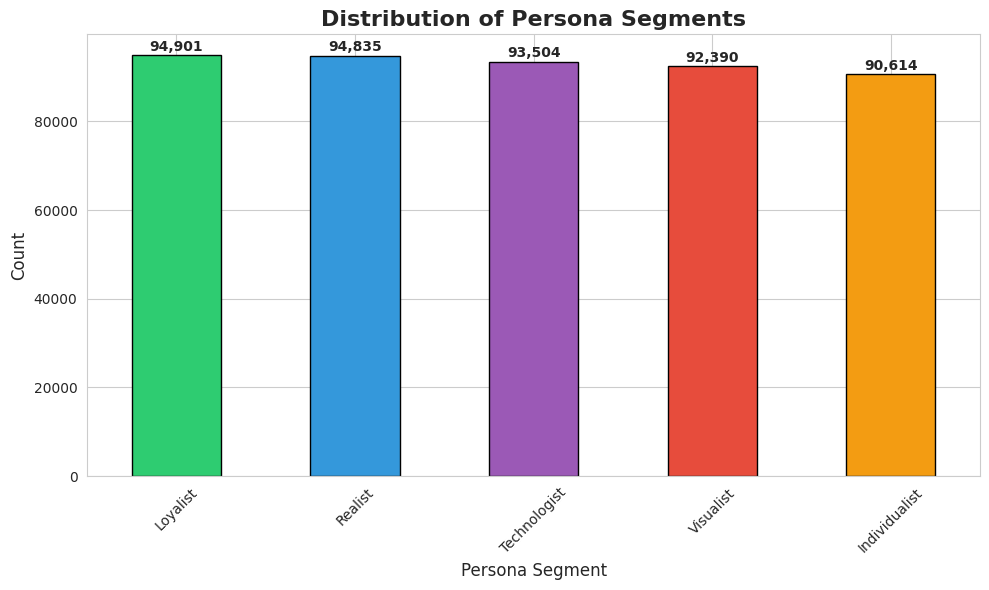


🔧 STEP 3: FEATURE ENGINEERING

📊 Numeric Features (3): ['UnitPrice', 'OrderQuantity', 'TotalAmount']
📊 Categorical Features (4): ['City', 'County', 'State', 'Brand']

--- Unique Values in Categorical Features ---
City: 10 unique values
County: 10 unique values
State: 50 unique values
Brand: 11 unique values

✅ Features shape: (466244, 7)
✅ Target shape: (466244,)
✅ Target classes: ['Technologist', 'Realist', 'Individualist', 'Loyalist', 'Visualist']

⚙️  STEP 4: DATA PREPROCESSING PIPELINE
✅ Preprocessing pipeline created!

✂️  STEP 5: TRAIN-TEST SPLIT

📊 Training set: 372,995 samples (80.0%)
📊 Testing set: 93,249 samples (20.0%)

🌲 STEP 6: TRAINING OPTIMIZED RANDOM FOREST

Model Configuration:
  - n_estimators: 200 trees
  - max_depth: 20
  - min_samples_split: 5
  - min_samples_leaf: 2
  - max_features: sqrt
  - class_weight: balanced

🚀 Training Random Forest...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  2.2min finished



✅ Training completed in 130.68 seconds (2.18 minutes)

📊 STEP 7: CROSS-VALIDATION

Performing 5-fold cross-validation...
✅ Cross-validation completed in 536.36 seconds

📈 CV Scores: [0.527  0.5259 0.5255 0.5281 0.5249]
📈 Mean CV Accuracy: 0.5263 (52.63%)
📈 Std Deviation: +/- 0.0022

📊 STEP 8: MODEL EVALUATION


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    1.4s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    1.4s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    1.4s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    1.4s finished



🎯 Test Set Accuracy: 0.5264 (52.64%)

--------------------------------------------------------------------------------
CLASSIFICATION REPORT
--------------------------------------------------------------------------------
               precision    recall  f1-score   support

Individualist       0.49      0.57      0.53     18123
     Loyalist       0.57      0.48      0.52     18980
      Realist       0.51      0.54      0.53     18967
 Technologist       0.54      0.52      0.53     18701
    Visualist       0.52      0.53      0.53     18478

     accuracy                           0.53     93249
    macro avg       0.53      0.53      0.53     93249
 weighted avg       0.53      0.53      0.53     93249


📊 STEP 9: CONFUSION MATRIX


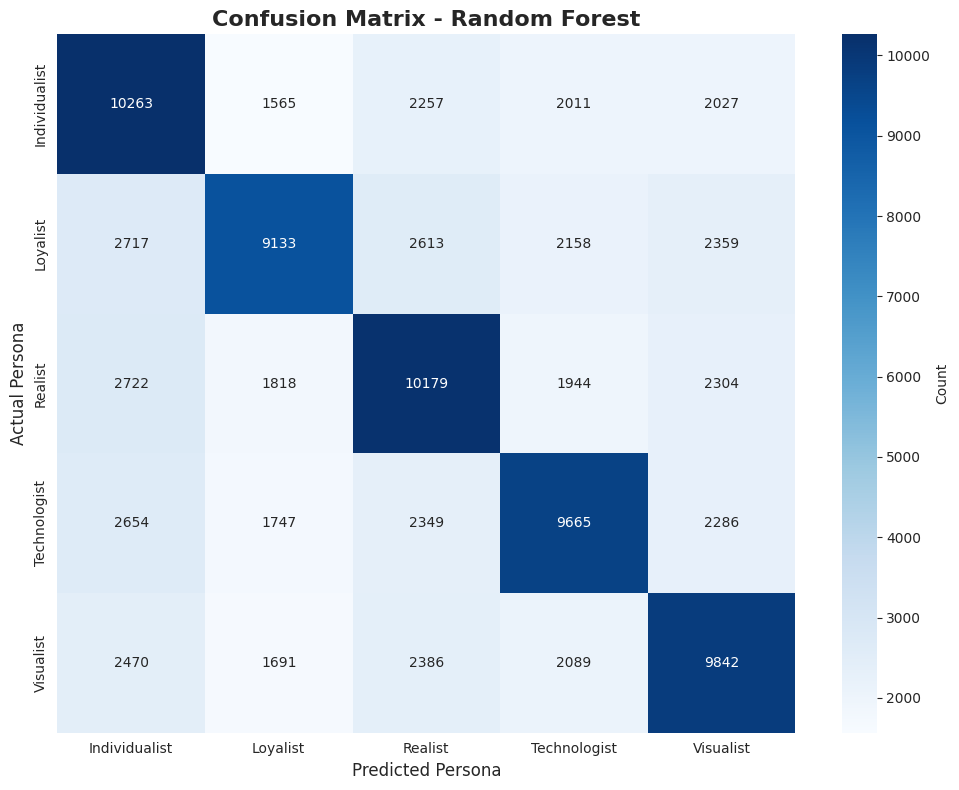

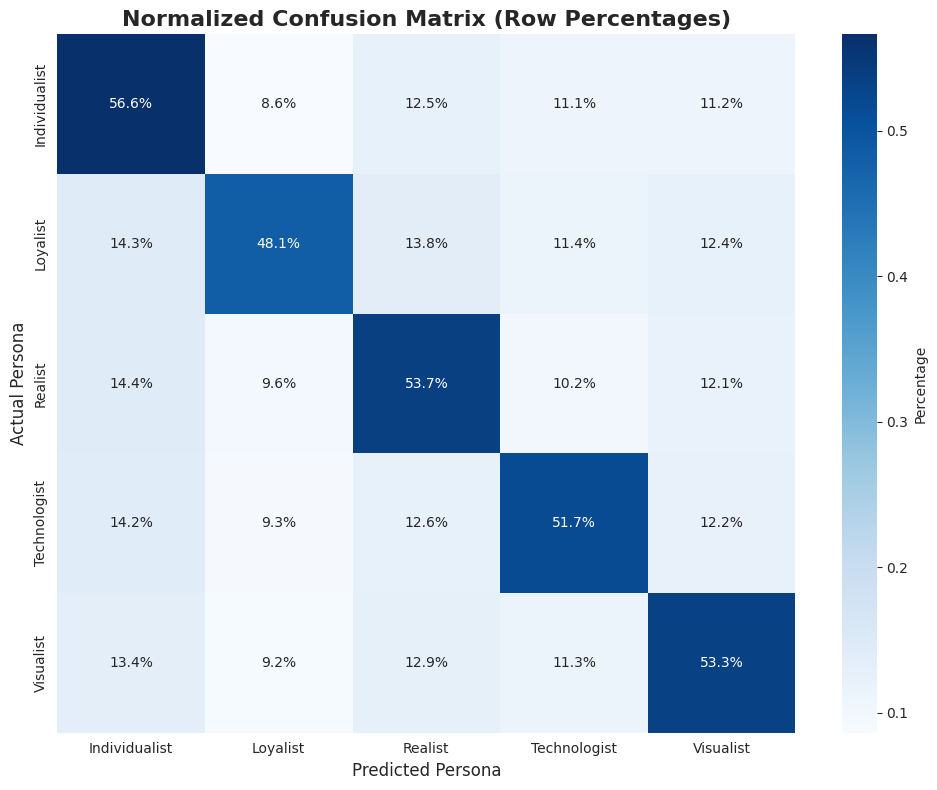


🔍 STEP 10: FEATURE IMPORTANCE ANALYSIS

--- Top 20 Most Important Features ---
                  Feature  Importance
                UnitPrice    0.074085
              TotalAmount    0.073500
            OrderQuantity    0.050087
              City_Dallas    0.032906
         City_Los Angeles    0.031618
        City_Philadelphia    0.030867
            City_San Jose    0.030646
             City_Phoenix    0.030603
             City_Houston    0.029579
           City_San Diego    0.028423
             City_Chicago    0.028408
         City_San Antonio    0.025747
   County_Maricopa County    0.024482
County_Los Angeles County    0.023922
      County_Kings County    0.023436
 County_Miami-Dade County    0.023075
     County_Dallas County    0.022529
            City_New York    0.021209
     County_Harris County    0.020274
   County_New York County    0.019818


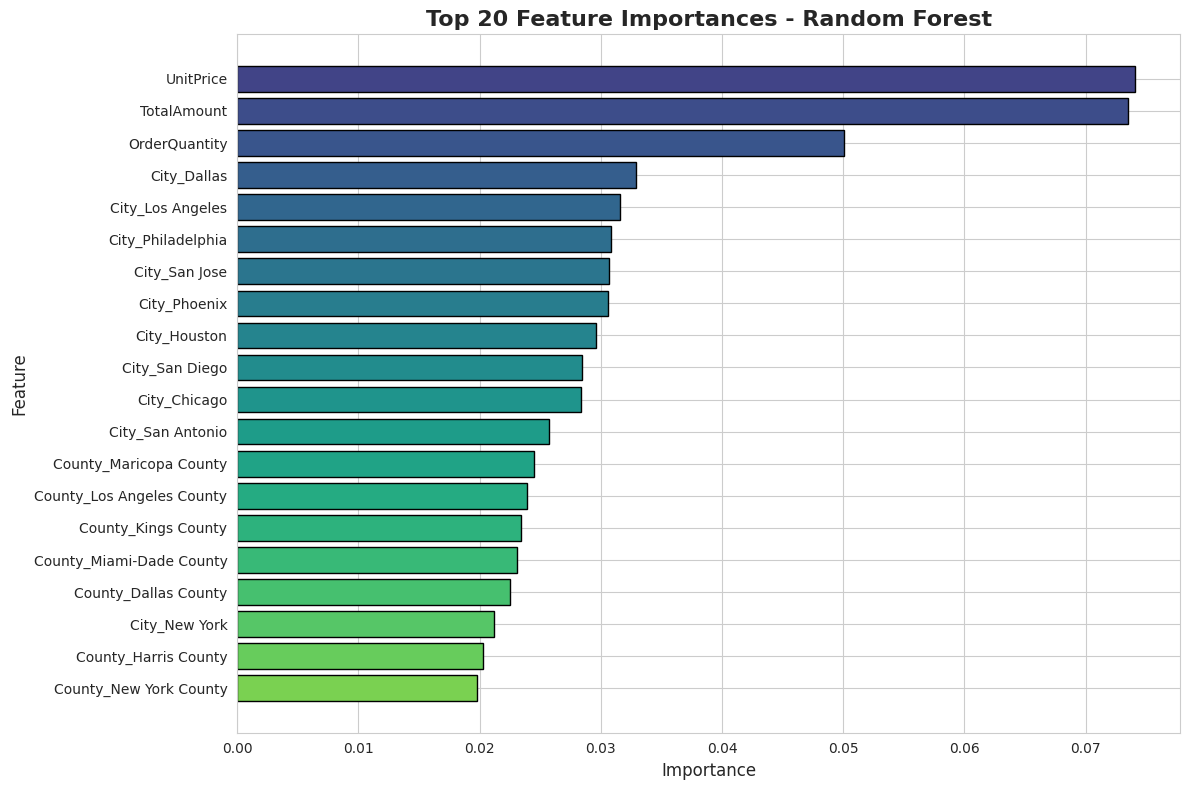


--- Feature Importance by Category ---
Numeric Features Total: 0.1977 (19.77%)
Categorical Features Total: 0.8023 (80.23%)


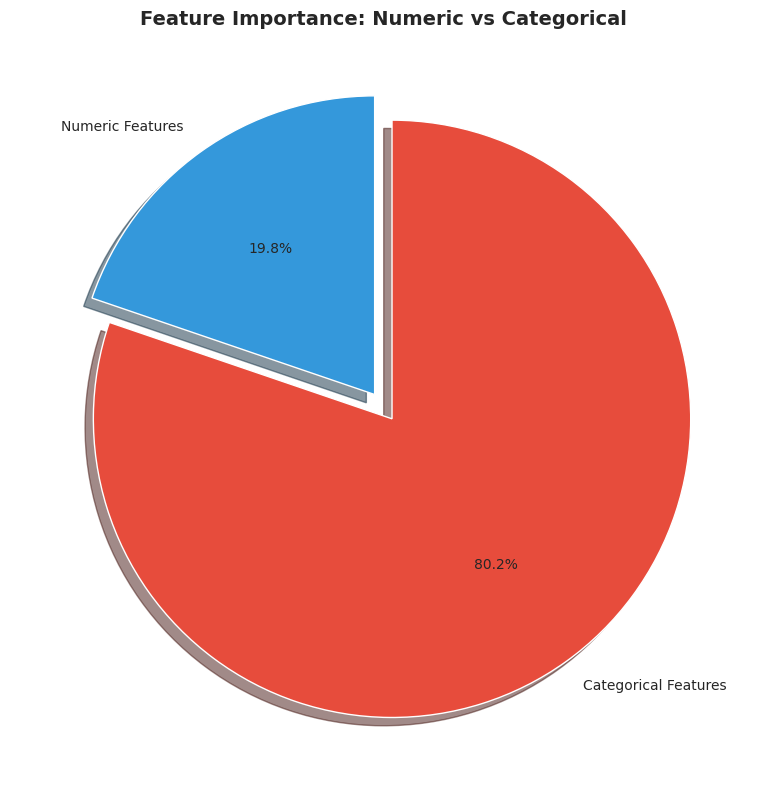


📈 STEP 11: ROC CURVE ANALYSIS


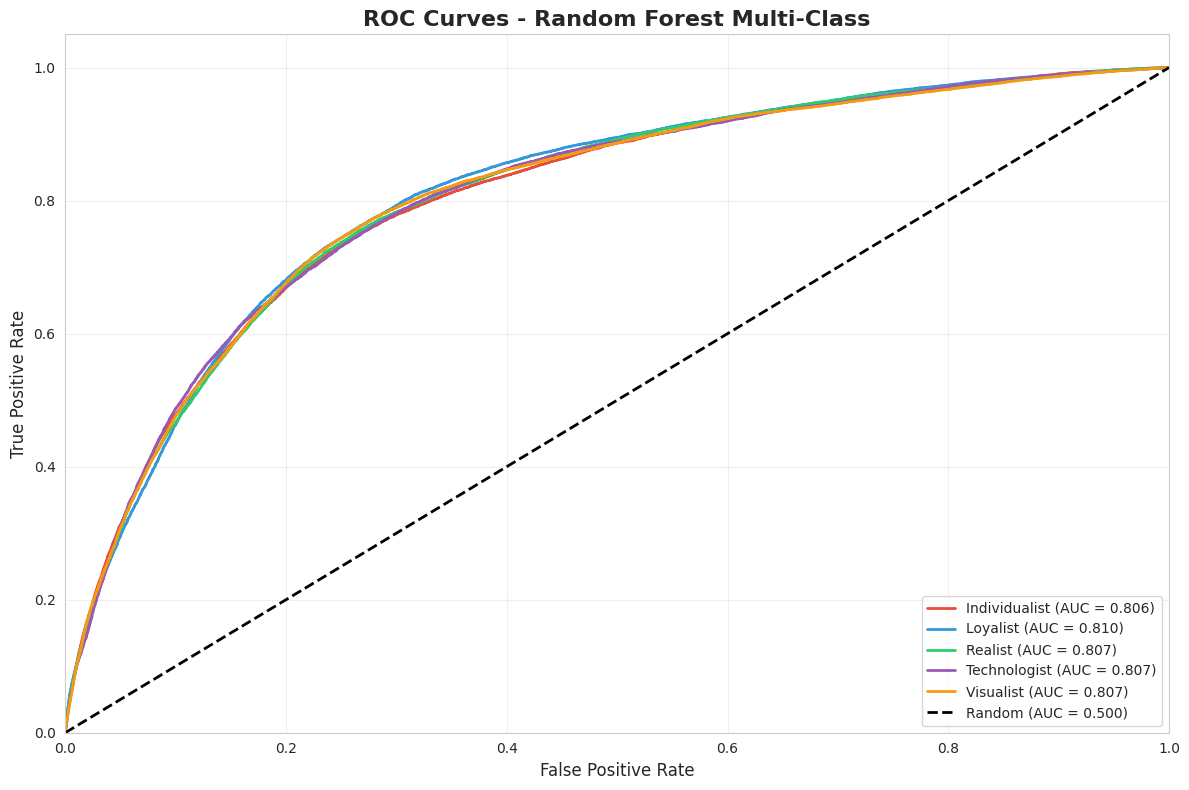


--- ROC AUC Scores by Persona ---
Individualist: 0.8056
Loyalist: 0.8105
Realist: 0.8070
Technologist: 0.8071
Visualist: 0.8067

🎯 Mean AUC: 0.8074

📊 STEP 12: PER-CLASS PERFORMANCE

--- Performance by Persona ---
      Persona  Precision   Recall  F1-Score  Support      AUC
 Technologist   0.540941 0.516817  0.528604    18701 0.807053
    Visualist   0.523010 0.532633  0.527778    18478 0.806653
Individualist   0.492797 0.566297  0.526997    18123 0.805582
      Realist   0.514507 0.536669  0.525354    18967 0.807021
     Loyalist   0.572458 0.481191  0.522872    18980 0.810496


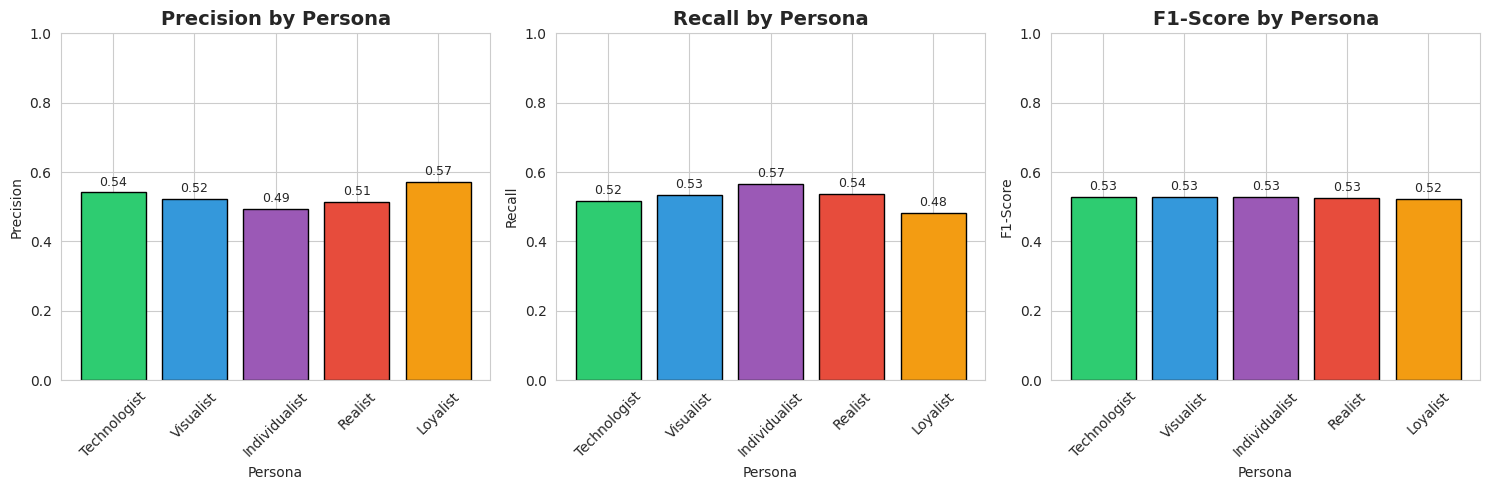


🔮 STEP 13: SAMPLE PREDICTIONS

First 15 Test Predictions:
       Actual     Predicted Correct  P(Indi)  P(Loya)  P(Real)  P(Tech)  P(Visu)
      Realist     Visualist       ❌    0.183    0.198    0.194    0.176    0.249
 Technologist Individualist       ❌    0.230    0.221    0.172    0.225    0.151
    Visualist Individualist       ❌    0.216    0.189    0.192    0.204    0.199
    Visualist     Visualist       ✅    0.181    0.182    0.170    0.179    0.288
     Loyalist      Loyalist       ✅    0.201    0.228    0.209    0.155    0.208
Individualist Individualist       ✅    0.293    0.101    0.177    0.206    0.222
 Technologist       Realist       ❌    0.195    0.149    0.282    0.246    0.129
     Loyalist     Visualist       ❌    0.185    0.221    0.171    0.184    0.239
     Loyalist     Visualist       ❌    0.196    0.201    0.198    0.197    0.207
     Loyalist  Technologist       ❌    0.147    0.220    0.199    0.253    0.182
    Visualist     Visualist       ✅    0.257    0.

In [3]:
# ============================================================================
# RANDOM FOREST CLASSIFIER FOR BASF GROWER PERSONA CLASSIFICATION
# OPTIMIZED FAST VERSION - Completes in ~5-10 minutes
# ============================================================================
# The Data Mine - Purdue University
# ============================================================================
#
# WHAT IS RANDOM FOREST?
# -----------------------
# Imagine you're trying to guess someone's persona. Instead of asking ONE person
# for their opinion, you ask 100 different people (trees), and each person looks
# at different aspects of the data. Then you take a VOTE - whatever persona
# most trees agree on wins!
#
# Why is this better than a single decision tree?
# - Single tree: Can memorize training data (overfitting)
# - Random Forest: Multiple trees averaging out = more robust predictions
#
# ============================================================================

# ============================================================================
# STEP 0: INSTALL AND IMPORT LIBRARIES
# ============================================================================

!pip install gdown --quiet

import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    roc_auc_score,
    roc_curve,
    precision_recall_fscore_support,
    f1_score
)
from sklearn.preprocessing import label_binarize
from sklearn.metrics import auc
import warnings
import time
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

print("✅ All libraries imported successfully!")
print("="*80)

# ============================================================================
# STEP 1: DOWNLOAD AND LOAD DATA
# ============================================================================

print("\n📥 STEP 1: DOWNLOADING AND LOADING DATA")
print("="*80)

file_id = '1UTV2i3WqbNK9in7w9k9Sy3rg5XLT1Mew'
print("Downloading dataset from Google Drive...")
gdown.download(f'https://drive.google.com/uc?id={file_id}', 'cleaned_dataset.csv', quiet=False)

print("\nLoading dataset...")
df = pd.read_csv('cleaned_dataset.csv')

print(f"\n✅ Dataset loaded successfully!")
print(f"📊 Dataset Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"📋 Columns: {df.columns.tolist()}")

# ============================================================================
# STEP 2: EXPLORATORY DATA ANALYSIS (EDA)
# ============================================================================

print("\n📊 STEP 2: EXPLORATORY DATA ANALYSIS")
print("="*80)

print("\n--- Dataset Info ---")
print(df.info())

print("\n--- Dataset Statistics (Numeric Columns) ---")
print(df.describe())

print("\n--- Missing Values ---")
missing = df.isnull().sum()
print(missing[missing > 0] if missing.sum() > 0 else "No missing values! ✅")

# Handle missing values in target variable
print(f"\n⚠️  Missing values in Persona_Segment: {df['Persona_Segment'].isnull().sum()}")
df = df.dropna(subset=['Persona_Segment'])
print(f"✅ Dataset shape after removing missing Persona_Segment: {df.shape}")

# Persona distribution
print("\n--- Persona Distribution ---")
persona_counts = df['Persona_Segment'].value_counts()
print(persona_counts)

# Visualize Persona Distribution
plt.figure(figsize=(10, 6))
colors = ['#2ecc71', '#3498db', '#9b59b6', '#e74c3c', '#f39c12']
persona_counts.plot(kind='bar', color=colors, edgecolor='black')
plt.title('Distribution of Persona Segments', fontsize=16, fontweight='bold')
plt.xlabel('Persona Segment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
for i, v in enumerate(persona_counts.values):
    plt.text(i, v + 1000, f'{v:,}', ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

# ============================================================================
# STEP 3: FEATURE ENGINEERING
# ============================================================================
# We use BOTH numeric and categorical features for better predictions!
# ============================================================================

print("\n🔧 STEP 3: FEATURE ENGINEERING")
print("="*80)

# Define features
numeric_features = ['UnitPrice', 'OrderQuantity', 'TotalAmount']
categorical_features = ['City', 'County', 'State', 'Brand']

print(f"\n📊 Numeric Features ({len(numeric_features)}): {numeric_features}")
print(f"📊 Categorical Features ({len(categorical_features)}): {categorical_features}")

# Check unique values
print("\n--- Unique Values in Categorical Features ---")
for col in categorical_features:
    print(f"{col}: {df[col].nunique()} unique values")

# Prepare features and target
X = df[numeric_features + categorical_features].copy()
y = df['Persona_Segment'].copy()

print(f"\n✅ Features shape: {X.shape}")
print(f"✅ Target shape: {y.shape}")
print(f"✅ Target classes: {y.unique().tolist()}")

# ============================================================================
# STEP 4: DATA PREPROCESSING PIPELINE
# ============================================================================

print("\n⚙️  STEP 4: DATA PREPROCESSING PIPELINE")
print("="*80)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ]
)

print("✅ Preprocessing pipeline created!")

# ============================================================================
# STEP 5: TRAIN-TEST SPLIT
# ============================================================================

print("\n✂️  STEP 5: TRAIN-TEST SPLIT")
print("="*80)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"\n📊 Training set: {X_train.shape[0]:,} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"📊 Testing set: {X_test.shape[0]:,} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

# ============================================================================
# STEP 6: TRAIN OPTIMIZED RANDOM FOREST
# ============================================================================
# Instead of expensive hyperparameter search, we use well-tuned defaults
# These parameters are based on best practices for large datasets:
#
# - n_estimators=200: Good balance of accuracy and speed
# - max_depth=20: Prevents overfitting while capturing patterns
# - min_samples_split=5: Requires at least 5 samples to split
# - min_samples_leaf=2: Each leaf must have at least 2 samples
# - max_features='sqrt': Use sqrt(n_features) at each split (standard)
# - class_weight='balanced': Handle any class imbalance
# ============================================================================

print("\n🌲 STEP 6: TRAINING OPTIMIZED RANDOM FOREST")
print("="*80)

# Create pipeline with optimized Random Forest
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=200,          # 200 trees - good balance
        max_depth=20,              # Limit depth to prevent overfitting
        min_samples_split=5,       # Minimum samples to split a node
        min_samples_leaf=2,        # Minimum samples in leaf
        max_features='sqrt',       # Standard for classification
        class_weight='balanced',   # Handle class imbalance
        random_state=42,
        n_jobs=-1,                 # Use all CPU cores
        verbose=1                  # Show progress
    ))
])

print("\nModel Configuration:")
print("  - n_estimators: 200 trees")
print("  - max_depth: 20")
print("  - min_samples_split: 5")
print("  - min_samples_leaf: 2")
print("  - max_features: sqrt")
print("  - class_weight: balanced")

print("\n🚀 Training Random Forest...")
start_time = time.time()
rf_pipeline.fit(X_train, y_train)
train_time = time.time() - start_time
print(f"\n✅ Training completed in {train_time:.2f} seconds ({train_time/60:.2f} minutes)")

# ============================================================================
# STEP 7: CROSS-VALIDATION
# ============================================================================
# We do 5-fold CV to get a robust accuracy estimate
# ============================================================================

print("\n📊 STEP 7: CROSS-VALIDATION")
print("="*80)

print("\nPerforming 5-fold cross-validation...")
cv_start = time.time()
cv_scores = cross_val_score(rf_pipeline, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
cv_time = time.time() - cv_start

print(f"✅ Cross-validation completed in {cv_time:.2f} seconds")
print(f"\n📈 CV Scores: {cv_scores.round(4)}")
print(f"📈 Mean CV Accuracy: {cv_scores.mean():.4f} ({cv_scores.mean()*100:.2f}%)")
print(f"📈 Std Deviation: +/- {cv_scores.std()*2:.4f}")

# ============================================================================
# STEP 8: MODEL EVALUATION ON TEST SET
# ============================================================================

print("\n📊 STEP 8: MODEL EVALUATION")
print("="*80)

# Make predictions
y_pred = rf_pipeline.predict(X_test)
y_pred_proba = rf_pipeline.predict_proba(X_test)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"\n🎯 Test Set Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

# Classification report
print("\n" + "-"*80)
print("CLASSIFICATION REPORT")
print("-"*80)
print(classification_report(y_test, y_pred))

# ============================================================================
# STEP 9: CONFUSION MATRIX
# ============================================================================

print("\n📊 STEP 9: CONFUSION MATRIX")
print("="*80)

class_labels = rf_pipeline.named_steps['classifier'].classes_
cm = confusion_matrix(y_test, y_pred)

# Plot raw confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=class_labels,
    yticklabels=class_labels,
    cbar_kws={'label': 'Count'}
)
plt.title('Confusion Matrix - Random Forest', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Persona', fontsize=12)
plt.ylabel('Actual Persona', fontsize=12)
plt.tight_layout()
plt.show()

# Plot normalized confusion matrix
plt.figure(figsize=(10, 8))
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(
    cm_normalized,
    annot=True,
    fmt='.1%',
    cmap='Blues',
    xticklabels=class_labels,
    yticklabels=class_labels,
    cbar_kws={'label': 'Percentage'}
)
plt.title('Normalized Confusion Matrix (Row Percentages)', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Persona', fontsize=12)
plt.ylabel('Actual Persona', fontsize=12)
plt.tight_layout()
plt.show()

# ============================================================================
# STEP 10: FEATURE IMPORTANCE ANALYSIS (THE GOOD STUFF!)
# ============================================================================

print("\n🔍 STEP 10: FEATURE IMPORTANCE ANALYSIS")
print("="*80)

# Get feature names
preprocessor_fitted = rf_pipeline.named_steps['preprocessor']
numeric_feature_names = numeric_features
categorical_feature_names = preprocessor_fitted.named_transformers_['cat'].get_feature_names_out(categorical_features).tolist()
all_feature_names = numeric_feature_names + categorical_feature_names

# Get importances
importances = rf_pipeline.named_steps['classifier'].feature_importances_

# Create DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

print("\n--- Top 20 Most Important Features ---")
print(feature_importance_df.head(20).to_string(index=False))

# Plot top 20
plt.figure(figsize=(12, 8))
top_20 = feature_importance_df.head(20)
colors_bar = plt.cm.viridis(np.linspace(0.2, 0.8, len(top_20)))
plt.barh(range(len(top_20)), top_20['Importance'].values, color=colors_bar, edgecolor='black')
plt.yticks(range(len(top_20)), top_20['Feature'].values)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Top 20 Feature Importances - Random Forest', fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Importance by category
print("\n--- Feature Importance by Category ---")
numeric_importance = feature_importance_df[feature_importance_df['Feature'].isin(numeric_features)]['Importance'].sum()
categorical_importance = 1 - numeric_importance
print(f"Numeric Features Total: {numeric_importance:.4f} ({numeric_importance*100:.2f}%)")
print(f"Categorical Features Total: {categorical_importance:.4f} ({categorical_importance*100:.2f}%)")

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie([numeric_importance, categorical_importance],
        labels=['Numeric Features', 'Categorical Features'],
        autopct='%1.1f%%',
        colors=['#3498db', '#e74c3c'],
        explode=(0.05, 0.05),
        shadow=True,
        startangle=90)
plt.title('Feature Importance: Numeric vs Categorical', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# ============================================================================
# STEP 11: ROC CURVE ANALYSIS
# ============================================================================

print("\n📈 STEP 11: ROC CURVE ANALYSIS")
print("="*80)

y_test_bin = label_binarize(y_test, classes=class_labels)
n_classes = len(class_labels)

fpr = dict()
tpr = dict()
roc_auc = dict()

plt.figure(figsize=(12, 8))
colors_roc = ['#e74c3c', '#3498db', '#2ecc71', '#9b59b6', '#f39c12']

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], color=colors_roc[i], lw=2,
             label=f'{class_labels[i]} (AUC = {roc_auc[i]:.3f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random (AUC = 0.500)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - Random Forest Multi-Class', fontsize=16, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\n--- ROC AUC Scores by Persona ---")
for i, persona in enumerate(class_labels):
    print(f"{persona}: {roc_auc[i]:.4f}")
print(f"\n🎯 Mean AUC: {np.mean(list(roc_auc.values())):.4f}")

# ============================================================================
# STEP 12: PER-CLASS PERFORMANCE
# ============================================================================

print("\n📊 STEP 12: PER-CLASS PERFORMANCE")
print("="*80)

precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred)

per_class_df = pd.DataFrame({
    'Persona': class_labels,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'Support': support,
    'AUC': [roc_auc[i] for i in range(n_classes)]
}).sort_values('F1-Score', ascending=False)

print("\n--- Performance by Persona ---")
print(per_class_df.to_string(index=False))

# Visualize
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
metrics = ['Precision', 'Recall', 'F1-Score']

for idx, metric in enumerate(metrics):
    ax = axes[idx]
    bars = ax.bar(per_class_df['Persona'], per_class_df[metric], color=colors, edgecolor='black')
    ax.set_title(f'{metric} by Persona', fontsize=14, fontweight='bold')
    ax.set_xlabel('Persona', fontsize=10)
    ax.set_ylabel(metric, fontsize=10)
    ax.set_ylim(0, 1)
    ax.tick_params(axis='x', rotation=45)
    for bar, val in zip(bars, per_class_df[metric]):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
                f'{val:.2f}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# ============================================================================
# STEP 13: SAMPLE PREDICTIONS
# ============================================================================

print("\n🔮 STEP 13: SAMPLE PREDICTIONS")
print("="*80)

sample_results = pd.DataFrame({
    'Actual': y_test.iloc[:15].values,
    'Predicted': y_pred[:15],
    'Correct': ['✅' if a == p else '❌' for a, p in zip(y_test.iloc[:15].values, y_pred[:15])]
})

for i, persona in enumerate(class_labels):
    sample_results[f'P({persona[:4]})'] = y_pred_proba[:15, i].round(3)

print("\nFirst 15 Test Predictions:")
print(sample_results.to_string(index=False))

# ============================================================================
# STEP 14: FINAL SUMMARY
# ============================================================================

print("\n" + "="*80)
print("🎉 FINAL MODEL SUMMARY")
print("="*80)

print(f"\n📋 Model: Random Forest Classifier")
print(f"📊 Number of Classes: {n_classes}")
print(f"📊 Classes: {class_labels.tolist()}")
print(f"📊 Total Features (after encoding): {len(all_feature_names)}")
print(f"   - Numeric: {len(numeric_features)}")
print(f"   - Categorical (encoded): {len(categorical_feature_names)}")

print(f"\n📈 Training Samples: {X_train.shape[0]:,}")
print(f"📈 Testing Samples: {X_test.shape[0]:,}")

print(f"\n🎯 RESULTS:")
print(f"   Cross-Validation Accuracy: {cv_scores.mean():.4f} ({cv_scores.mean()*100:.2f}%)")
print(f"   Test Set Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"   Mean ROC AUC: {np.mean(list(roc_auc.values())):.4f}")

print("\n🔧 Model Parameters:")
print("   n_estimators: 200")
print("   max_depth: 20")
print("   min_samples_split: 5")
print("   min_samples_leaf: 2")
print("   max_features: sqrt")
print("   class_weight: balanced")

print("\n🏆 Top 5 Most Important Features:")
for idx, row in feature_importance_df.head(5).iterrows():
    print(f"   {row['Feature']}: {row['Importance']:.4f}")

print(f"\n⏱️  Total Training Time: {train_time:.2f} seconds")

print("\n" + "="*80)
print("✅ RANDOM FOREST ANALYSIS COMPLETE!")
print("="*80)

# ============================================================================
# STEP 15: SAVE MODEL
# ============================================================================

print("\n💾 STEP 15: SAVING MODEL")
print("="*80)

import joblib
model_filename = 'random_forest_persona_classifier.pkl'
joblib.dump(rf_pipeline, model_filename)
print(f"\n✅ Model saved as '{model_filename}'")
print("\nTo load and use the model later:")
print("    loaded_model = joblib.load('random_forest_persona_classifier.pkl')")
print("    predictions = loaded_model.predict(new_data)")
